In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from cycler import cycler

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

default_cycler = (cycler(linestyle=['-', '--', '-.', ':']) +
                  cycler(marker=['o', 'v', '^', '<']))
#plt.rc('axes', prop_cycle=default_cycler)


In [2]:
def p2f(x):
    return float(x.strip('%'))/100

In [3]:
df = []
for od in range(1, 12+1):
    df.append(pd.read_csv(f'./sim{od}.ratio.csv', sep=',', converters={'c_packet_rate': p2f}))

dfc = pd.read_csv('counter1.csv', sep=',')

In [4]:
df[0]['mode'] = 'FB_5to11_整數倍後退'
df[1]['mode'] = 'FB_5to11_浮點數倍後退'
df[2]['mode'] = 'FB_3to11_整數倍後退'
df[3]['mode'] = 'FB_3to11_浮點數倍後退'
df[4]['mode'] = 'FB_4to11_整數倍後退'
df[5]['mode'] = 'FB_4to11_浮點數倍後退'
df[6]['mode'] = 'FB_5to12_整數倍後退'
df[7]['mode'] = 'FB_5to12_浮點數倍後退'
df[8]['mode'] = 'FB_6to11_整數倍後退'
df[9]['mode'] = 'FB_6to11_浮點數倍後退'
df[10]['mode'] = 'FB_6to12_整數倍後退'
df[11]['mode'] = 'FB_6to12_浮點數倍後退'



In [5]:
df = pd.concat([d for d in df], axis=0, sort=False)

In [6]:
df = df.sort_values(['mode', 'period', 'nodes'])

In [7]:
df['c_sensor_buffer_packet_rate'] = df['c_sensor_buffer_packets'] / df['nodes']
df['c_sensor_drop_packet_rate'] = df['c_sensor_drop_packets'] / df['nodes']
df['c_sensor_success_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['nodes']
df['avg_agg_packets'] = df['agg_packets'] / df['period']
df['avg_append_packets'] = df['append_packets'] / df['period']
df['agg_packets_percent'] = df['agg_packets'] / df['c_sensor_want_send_packets']
df['append_packets_percent'] = df['append_packets'] / df['c_sensor_want_send_packets']

In [8]:
select = df.groupby(['mode', 'nodes', 'period'], as_index=False).mean()

In [9]:
select

mode  nodes  period  c_packet_rate  \
0      FB_3to11_整數倍後退    100      50       0.901547   
1      FB_3to11_整數倍後退    100     100       0.907550   
2      FB_3to11_整數倍後退    100     150       0.921127   
3      FB_3to11_整數倍後退    100     200       0.938993   
4      FB_3to11_整數倍後退    100     250       0.948120   
...               ...    ...     ...            ...   
1135  FB_6to12_浮點數倍後退    500     750       0.935807   
1136  FB_6to12_浮點數倍後退    500     800       0.947350   
1137  FB_6to12_浮點數倍後退    500     850       0.935310   
1138  FB_6to12_浮點數倍後退    500     900       0.941100   
1139  FB_6to12_浮點數倍後退    500     950       0.942277   

      c_sensor_want_send_packets  c_sensor_buffer_packets  \
0                    7185.000000              2396.000000   
1                    3590.000000              1551.333333   
2                    2393.000000               708.333333   
3                    1849.333333               338.666667   
4                    1443.666667               139.333333   
...                          ...                      ...   
1135                 2422.000000               778.000000   
1136                 2224.000000               646.666667   
1137                 2091.000000               570.666667   
1138                 2002.666667               498.666667   
1139                 1874.666667               443.000000   

      c_sensor_send_success  c_sensor_drop_packets  agg_packets  \
0               1933.333333            2855.666667          0.0   
1               1822.333333             216.333333          0.0   
2               1679.333333               5.333333          0.0   
3               1510.666667               0.000000          0.0   
4               1304.333333               0.000000          0.0   
...                     ...                    ...          ...   
1135            1644.000000               0.000000          0.0   
1136            1577.333333               0.000000          0.0   
1137            1520.333333               0.000000          0.0   
1138            1504.000000               0.000000          0.0   
1139            1431.666667               0.000000          0.0   

      append_packets  out_of_date_packets  c_sensor_buffer_packet_rate  \
0                0.0                  0.0                    23.960000   
1                0.0                  0.0                    15.513333   
2                0.0                  0.0                     7.083333   
3                0.0                  0.0                     3.386667   
4                0.0                  0.0                     1.393333   
...              ...                  ...                          ...   
1135             0.0                  0.0                     1.556000   
1136             0.0                  0.0                     1.293333   
1137             0.0                  0.0                     1.141333   
1138             0.0                  0.0                     0.997333   
1139             0.0                  0.0                     0.886000   

      c_sensor_drop_packet_rate  c_sensor_success_packet_rate  \
0                     28.556667                     17.429338   
1                      2.163333                     16.539391   
2                      0.053333                     15.466632   
3                      0.000000                     14.186232   
4                      0.000000                     12.366350   
...                         ...                           ...   
1135                   0.000000                      3.076610   
1136                   0.000000                      2.988554   
1137                   0.000000                      2.843331   
1138                   0.000000                      2.830588   
1139                   0.000000                      2.698004   

      avg_agg_packets  avg_append_packets  agg_packets_percent  \
0                 0.0                 0.0                  0.0   
1               

In [10]:

sector2 = select.groupby('nodes')

In [11]:
sector2.size()

nodes
100    228
200    228
300    228
400    228
500    228
dtype: int64

## 封包到達率

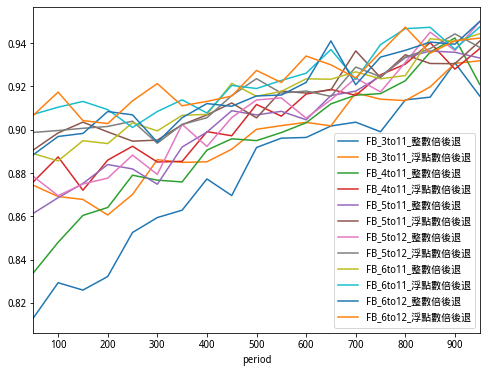

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector2.get_group(500).groupby(['mode']):
    d.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

Text(0, 0.5, '封包到達率')

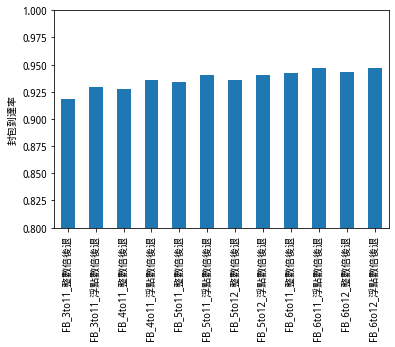

In [13]:

b = df.groupby('mode', as_index=False).mean()
b.columns

b.plot.bar(x='mode', y='c_packet_rate', ylim=(0.8, 1), legend=False)

plt.xlabel('')
plt.ylabel('封包到達率')

In [14]:
b.to_csv('各式後退封包到達率.csv')

In [15]:
df

mode     sim  nodes  period  c_packet_rate  \
270   FB_3to11_整數倍後退   sim-1    100      50        0.91150   
275   FB_3to11_整數倍後退   sim-2    100      50        0.89990   
280   FB_3to11_整數倍後退   sim-3    100      50        0.89324   
272   FB_3to11_整數倍後退   sim-1    200      50        0.85845   
277   FB_3to11_整數倍後退   sim-2    200      50        0.87675   
..               ...     ...    ...     ...            ...   
111  FB_6to12_浮點數倍後退   sim-2    400     950        0.96006   
116  FB_6to12_浮點數倍後退   sim-3    400     950        0.94250   
108  FB_6to12_浮點數倍後退   sim-1    500     950        0.94203   
113  FB_6to12_浮點數倍後退   sim-2    500     950        0.95067   
118  FB_6to12_浮點數倍後退   sim-3    500     950        0.93413   

     c_sensor_want_send_packets  c_sensor_buffer_packets  \
270                        7076                     2391   
275                        7294                     2401   
280                        7185                     2396   
272                       14393                     4879   
277                       14522                     4915   
..                          ...                      ...   
111                        1586                      284   
116                        1535                      248   
108                        1928                      479   
113                        1882                      463   
118                        1814                      387   

     c_sensor_send_success  c_sensor_drop_packets  agg_packets  \
270                   1922                   2763            0   
275                   1939                   2954            0   
280                   1939                   2850            0   
272                   2290                   7224            0   
277                   2215                   7392            0   
..                     ...                    ...          ...   
111                   1302                      0            0   
116                   1287                      0            0   
108                   1449                      0            0   
113                   1419                      0            0   
118                   1427                      0            0   

     append_packets  out_of_date_packets  c_sensor_buffer_packet_rate  \
270               0                    0                       23.910   
275               0                    0                       24.010   
280               0                    0                       23.960   
272               0                    0                       24.395   
277               0                    0                       24.575   
..              ...                  ...                          ...   
111               0                    0                        0.710   
116               0                    0                        0.620   
108               0                    0                        0.958   
113               0                    0                        0.926   
118               0                    0                        0.774   

     c_sensor_drop_packet_rate  c_sensor_success_packet_rate  avg_agg_packets  \
270                      27.63                     17.519030              0.0   
275                      29.54                     17.449061              0.0   
280                      28.50                     17.319924              0.0   
272                      36.12                      9.829252              0.0   
277                      36.96                      9.710006              0.0   
..                         ...                           ...              ...   
111                       0.00                      3.124995              0.0   
116                       0.00                      3.032494              0.0   
108                       0.00                      2.730003              0.0   
113                       0.00                      2.698001          

Text(0, 0.5, '封包到達率')

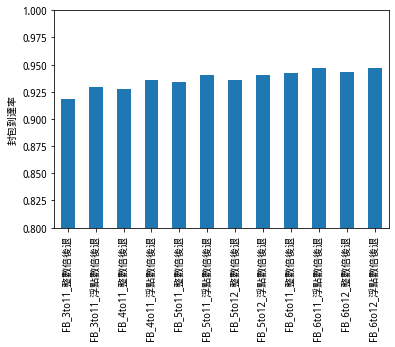

In [16]:
b = df.groupby('mode', as_index=False).mean()
b.columns

b.plot.bar(x='mode', y='c_packet_rate', ylim=(0.8, 1), legend=False)

plt.xlabel('')
plt.ylabel('封包到達率')

Text(0, 0.5, '平均後退時間')

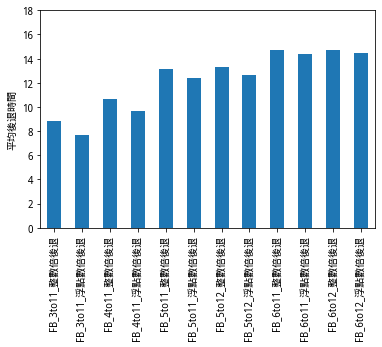

In [19]:
dfc.plot.bar(x='mode', y='backoff', ylim=(0, 18), legend=False)

plt.xlabel('')
plt.ylabel('平均後退時間')